In [4]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf
from skimage.transform import downscale_local_mean #For binning
from skimage.filters import threshold_otsu, threshold_local

import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays

import sys
#sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
#import ddm_analysis_and_fitting as ddm   

import tiff_file 

import io 
import sys
import csv

from PIL import Image

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.2 #set the value globally
mpl.rcParams['mathtext.default'] = 'regular'

In [89]:
gr_time = []
gr_dist = []
gr_control = [[],[],[],[],[]]
gr_control_SE = [[],[],[],[],[]]

gr_static = [[],[],[],[],[]]
gr_static_SE = [[],[],[],[],[]]

gr_p1 = [[],[],[],[],[]]
gr_p1_SE = [[],[],[],[],[]]
gr_p2 = [[],[],[],[],[]]
gr_p2_SE = [[],[],[],[],[]]
gr_p3 = [[],[],[],[],[]]
gr_p3_SE = [[],[],[],[],[]]

In [90]:
import csv

with open("Lauren's g(r) curves - p1.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        gr_time.append(row)
        gr_p1[0].append(row[1])
        gr_p1_SE[0].append(row[2])
            
        gr_p1[1].append(row[3])
        gr_p1_SE[1].append(row[4])
        
        gr_p1[2].append(row[5])
        gr_p1_SE[2].append(row[6])
        
        gr_p1[3].append(row[7])
        gr_p1_SE[3].append(row[8])
        
        gr_p1[4].append(row[9])
        gr_p1_SE[4].append(row[10])
        
with open("Lauren's g(r) curves - p2.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        gr_time.append(row)
        gr_p2[0].append(row[1])
        gr_p2_SE[0].append(row[2])
            
        gr_p2[1].append(row[3])
        gr_p2_SE[1].append(row[4])
        
        gr_p2[2].append(row[5])
        gr_p2_SE[2].append(row[6])
        
        gr_p2[3].append(row[7])
        gr_p2_SE[3].append(row[8])
        
        gr_p2[4].append(row[9])
        gr_p2_SE[4].append(row[10])
        
with open("Lauren's g(r) curves - p3.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        gr_time.append(row)
        gr_p3[0].append(row[1])
        gr_p3_SE[0].append(row[2])
            
        gr_p3[1].append(row[3])
        gr_p3_SE[1].append(row[4])
        
        gr_p3[2].append(row[5])
        gr_p3_SE[2].append(row[6])
        
        gr_p3[3].append(row[7])
        gr_p3_SE[3].append(row[8])
        
        gr_p3[4].append(row[9])
        gr_p3_SE[4].append(row[10])

with open("Lauren's g(r) curves - control.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        gr_time.append(row)
        gr_control[0].append(row[1])
        gr_control_SE[0].append(row[2])
            
        gr_control[1].append(row[3])
        gr_control_SE[1].append(row[4])
        
        gr_control[2].append(row[5])
        gr_control_SE[2].append(row[6])
        
        gr_control[3].append(row[7])
        gr_control_SE[3].append(row[8])
        
        gr_control[4].append(row[9])
        gr_control_SE[4].append(row[10])
        
with open("Lauren's g(r) curves - static.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        gr_dist.append(row[0])
        gr_static[0].append(row[1])
        gr_static_SE[0].append(row[2])
            
        gr_static[1].append(row[3])
        gr_static_SE[1].append(row[4])
        
        gr_static[2].append(row[5])
        gr_static_SE[2].append(row[6])
        
        gr_static[3].append(row[7])
        gr_static_SE[3].append(row[8])
        
        gr_static[4].append(row[9])
        gr_static_SE[4].append(row[10])

In [91]:

print(len(gr_static))

5


In [92]:
all_gr_curves = [gr_control, gr_p1, gr_p2, gr_p3, gr_static]
all_gr_SE = [gr_control_SE, gr_p1_SE, gr_p2_SE, gr_p3_SE, gr_static_SE]
print(len(all_gr_curves))
print(len(all_gr_curves[3]))
print(len(all_gr_curves[3][0]))

5
5
262


In [84]:
time_array = [1, 7, 14, 21, 28]
c_list = [0,2,4,6,8]
pixels_per_bead = 1
num_times = 9

In [176]:

def select_cmap(frame_key):
    if frame_key == 0:
        print("control")
        #matplotlib.cm.get_cmap('Reds')
        return 's', 'yellow', matplotlib.cm.get_cmap('gist_yarg'), "No bonds" 
    elif frame_key == 1:
        print("p1")
        #from matplotlib.markers import MarkerStyle
        #p1marker = MarkerStyle('o', fillstyle='none')
        return 'o', 'silver', matplotlib.cm.get_cmap('binary'), "1 bond"
    elif frame_key == 2:
        print("p2")
        from matplotlib.markers import MarkerStyle
        p2marker = MarkerStyle('o', fillstyle='bottom')
        return p2marker, 'deeppink', matplotlib.cm.get_cmap('Reds'), "2 bonds"  
    elif frame_key == 3:
        print("p3")
        return 'o', 'blueviolet', matplotlib.cm.get_cmap('RdPu'), "3 bonds" 
    elif frame_key == 4:
        print("static")
        return '^', 'c', matplotlib.cm.get_cmap('Blues'), "Permanent"

In [86]:
fig_size = 7,6
###  size of output figures
font_size = 20
### font size
dpi_num = 600
### image quality level (recommendation: 600)
svg_saveto = "Z:\\Gregor L\\__Kai Colloids\\Lauren's g(r) curves\\"
data_saveto = "Z:\\Gregor L\\__Kai Colloids\\Lauren's g(r) curves\\"

<IPython.core.display.Javascript object>


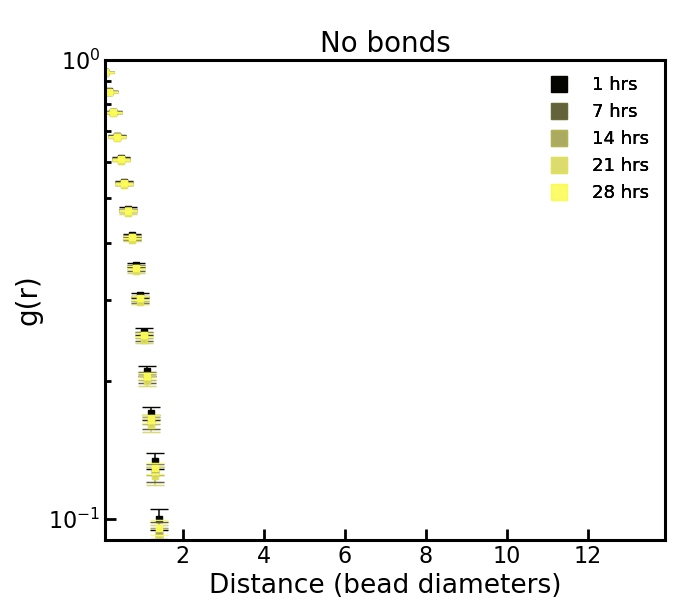

control


In [191]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='both', direction='in', which='major', length=8, width=2, labelsize=font_size-4)
ax.tick_params(axis='both', direction='in', which='minor', length=4, width=2, labelsize=font_size-4)

marker = 'o'
mS = 4
mEw = 1.2
linew = 1.0
elinew = 1.1
cap_size = 6.5

fk = 0
marker2, cmap, cmap2, data_label = select_cmap(fk)
lines1 = []                                
lines2 = []
lines3 = []
time_arr = []
for i in range(0,5,1):
    time = str(time_array[i])+" hrs"
    time_arr.append(time)
    c = c_list[i]
    
     #control
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.99-(c*0.12)), alpha=(0.979-((c-1)*0.02)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap, alpha=(0.08+((c-1)*0.065)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.12)), alpha=0)  #  
    lines1 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, c=cmap2(0.99-(c*0.12)),
                      alpha=(0.979-((c-1)*0.02)))
    lines2 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, c=cmap, alpha=(0.08+((c-1)*0.07)))
    lines3 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, c=cmap2(0.999-(c*0.12)), alpha=0)  
    
    ''' #p1:
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.99-(c*0.12)), alpha=(0.979-((c-1)*0.02)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap, alpha=(0.08+((c-1)*0.07)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.12)), alpha=0)  #  
    lines1 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, mew=mEw, c=cmap2(0.99-(c*0.12)),
                      alpha=(0.979-((c-1)*0.02)))
    lines2 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, mew=mEw, c=cmap, alpha=(0.08+((c-1)*0.07)))
    lines3 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, mew=mEw, c=cmap2(0.999-(c*0.12)), alpha=0)  '''
    
    ''' #p2:
    #mEw = 0.2
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap, alpha=(0.99-(c*0.082)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.103)), alpha=(0.6-((c-1)*0.07)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.104)), alpha=(0.6-((c-2)*0.085)))
    #ax.plot(gr_dist, all_gr_curves[fk][i], marker='o', ms=mS, ls='', c='w')
    lines1 += ax.plot(gr_dist, all_gr_curves[fk][i], marker='o', ms=mS, mew=mEw, ls='', 
                      c=cmap, alpha=(0.99-(c*0.082)))
    lines2 += ax.plot(gr_dist, all_gr_curves[fk][i], marker='o', ms=mS, mew=mEw, ls='', 
                      c=cmap2(0.999-(c*0.103)), alpha=(0.6-((c-1)*0.07)))
    lines3 += ax.plot(gr_dist, all_gr_curves[fk][i], marker='o', ms=mS, mew=mEw, ls='', 
                      c=cmap2(0.999-(c*0.104)), alpha=(0.6-((c-2)*0.085)))  '''
    
    ''' #p3:
    #mEw = 0.4
    cmap3 = matplotlib.cm.get_cmap('Purples')
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap, alpha=(0.99-(c*0.062)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap3(0.999-(c*0.124)), alpha=(0.6-((c-2)*0.095)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.123)), alpha=(0.6-((c-1)*0.07)))
    lines1 += ax.plot(gr_dist, all_gr_curves[fk][i], marker=marker2, ms=mS, mew=mEw, ls='', 
                      c=cmap, alpha=(0.99-(c*0.092)))
    lines2 += ax.plot(gr_dist, all_gr_curves[fk][i], marker=marker2, ms=mS, mew=mEw, ls='', 
                      c=cmap3(0.999-(c*0.124)), alpha=(0.6-((c-2)*0.095)))
    lines3 += ax.plot(gr_dist, all_gr_curves[fk][i], marker=marker2, ms=mS, mew=mEw, ls='', 
                      c=cmap2(0.999-(c*0.123)), alpha=(0.6-((c-1)*0.07))) '''
      
      #    

    ''' #EA:
    lines1 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, c=cmap, alpha=(0.99-(c*0.08)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap, alpha=(0.99-(c*0.08)))
    lines2 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, c=cmap2(0.999-(c*0.1)), alpha=(0.6-((c-2)*0.04)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.1)), alpha=(0.6-((c-2)*0.04)))
    lines3 += ax.plot(gr_dist, all_gr_curves[fk][i], marker2, ms=mS, c=cmap2(0.999-(c*0.124)), alpha=(0.7-((c-2)*0.045)))
    ax.errorbar(gr_dist, all_gr_curves[fk][i], all_gr_SE[fk][i], fmt = 'none', elinewidth=elinew, capsize=cap_size, 
                c=cmap2(0.999-(c*0.124)), alpha=(0.7-((c-2)*0.045)))  #    '''

ax.set_yscale("log")
ax.set_ylim(0.09, 1.0)
#ax.set_ylim(-0.03, 1.0)

#ax.set_xscale("log")
ax.set_xlim(0.085, 13.9) 
#ax.set_xlim(0.085, 5)
#ax.set_xlim(0, 4.8)
    
title =  data_label #+ " (normalized CDF)"   #"Time = " + str(time) + " hrs,
ax.set_title(title, fontsize= (font_size))
plt.ylabel('g(r)', fontsize=font_size)
plt.xlabel('Distance (bead diameters)', fontsize=font_size-1)


#leg1 = ax.legend(markerscale=3., fontsize=font_size-6, loc = 'upper right', framealpha= 0, frameon=False)
from matplotlib.legend import Legend
leg1 = Legend(ax, lines1, time_arr, markerscale=3., fontsize=font_size-7,
             loc='upper right', framealpha= 0, frameon=False)
leg2 = Legend(ax, lines2, time_arr, markerscale=3., fontsize=font_size-7,
             loc='upper right', framealpha= 0, frameon=False)
leg3 = Legend(ax, lines3, time_arr, markerscale=3., fontsize=font_size-7,
             loc='upper right', framealpha= 0, frameon=False)
ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)

'''leg1 = Legend(ax, lines1, time_arr, markerscale=2.5, fontsize=font_size-7,
             loc='upper right', framealpha= 0, frameon=False)
leg2 = Legend(ax, lines2, time_arr, markerscale=2.5, fontsize=font_size-7,
             loc='upper right', framealpha= 0, frameon=False)
leg3 = Legend(ax, lines3, time_arr, markerscale=2.5, fontsize=font_size-7,
             loc='upper right', framealpha= 0, frameon=False)
ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)  '''
plt.subplots_adjust(bottom=0.1, left=0.15, right=0.95, top=0.9)
#ax.axhline((1/np.exp(1)))
plt.show()

title =  data_label + " (average g(r))"   #, transparent=True
fig.savefig(data_saveto+ "Lauren's g(r) - "+title+".png", dpi=600, bbox_inches ='tight', transparent=True)
fig.savefig(svg_saveto+ "Lauren's g(r) - "+title+".svg", dpi=800, bbox_inches ='tight', transparent=True)

In [40]:
print(len(gr_dist))
print(len(all_gr_curves))
print(len(all_gr_curves[4]))
print(len(all_gr_curves[4][0]))

55
5
55
262


In [45]:
print(all_gr_curves[4][1])
print(all_gr_curves[4][3])

[0.0, 0.0944, 0.189, 0.283, 0.378, 0.472, 0.566, 0.661, 0.755, 0.85, 0.944, 1.04, 1.13, 1.23, 1.32, 1.42, 1.51, 1.6, 1.7, 1.79, 1.89, 1.98, 2.08, 2.17, 2.27, 2.36, 2.45, 2.55, 2.64, 2.74, 2.83, 2.93, 3.02, 3.12, 3.21, 3.3, 3.4, 3.49, 3.59, 3.68, 3.78, 3.87, 3.96, 4.06, 4.15, 4.25, 4.34, 4.44, 4.53, 4.63, 4.72, 4.81, 4.91, 5.0, 5.1, 5.19, 5.29, 5.38, 5.48, 5.57, 5.66, 5.76, 5.85, 5.95, 6.04, 6.14, 6.23, 6.32, 6.42, 6.51, 6.61, 6.7, 6.8, 6.89, 6.99, 7.08, 7.17, 7.27, 7.36, 7.46, 7.55, 7.65, 7.74, 7.84, 7.93, 8.02, 8.12, 8.21, 8.31, 8.4, 8.5, 8.59, 8.68, 8.78, 8.87, 8.97, 9.06, 9.16, 9.25, 9.35, 9.44, 9.53, 9.63, 9.72, 9.82, 9.91, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7